<a href="https://colab.research.google.com/github/Nidhinbc97/ML-AI/blob/main/ML_AI_Assignment_03_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/train_loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

Checking Missing Values

In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
data['Gender'].mode()[0]

'Male'

Resolving the missing value issue

In [9]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data['Married'].mode()[0]

'Yes'

In [12]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [13]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
data['Dependents'] = data['Dependents'].str.strip('+')

In [15]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].median())

In [16]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [18]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [19]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [20]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [21]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


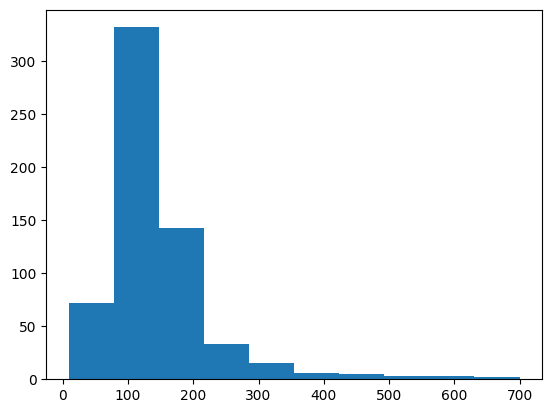

In [23]:
plt.hist(data['LoanAmount'])
plt.show()

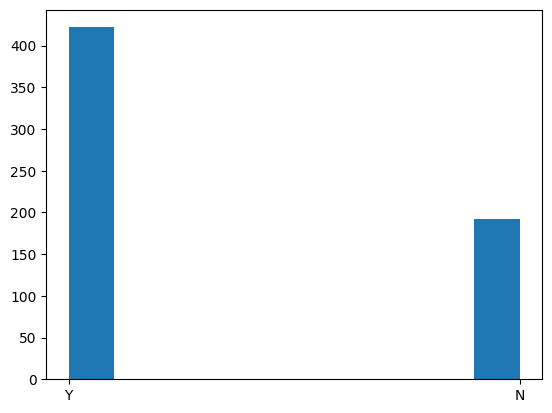

In [24]:
plt.hist(data['Loan_Status'])
plt.show()

In [26]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Encoding

In [27]:
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1})

In [28]:
data['Married'] = data['Married'].replace({'Yes':1,'No':0})

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
data['Dependents'] = data['Dependents'].astype('int32')

In [31]:
data['Gender'] = data['Gender'].astype('int32')

In [32]:
data['Married'] = data['Married'].astype('int32')

In [33]:
data['Education'] = data['Education'].replace({'Graduate':1,'Not Graduate':0})

In [34]:
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1,'No':0})

In [35]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [36]:
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1,'N':0})

In [37]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [38]:
data['Property_Area'] = data['Property_Area'].replace({'Urban':0,'Rural':1,'Semiurban':2})

In [39]:
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [40]:
data.drop(['Loan_ID'],axis = 1,inplace = True)

In [41]:
x = data.drop(['Loan_Status'],axis = 1)
y = data['Loan_Status']

Train_Test_Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

In [45]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
y_pred = clf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
print('Accuracy = ',accuracy_score(y_test,y_pred))

Accuracy =  0.7142857142857143


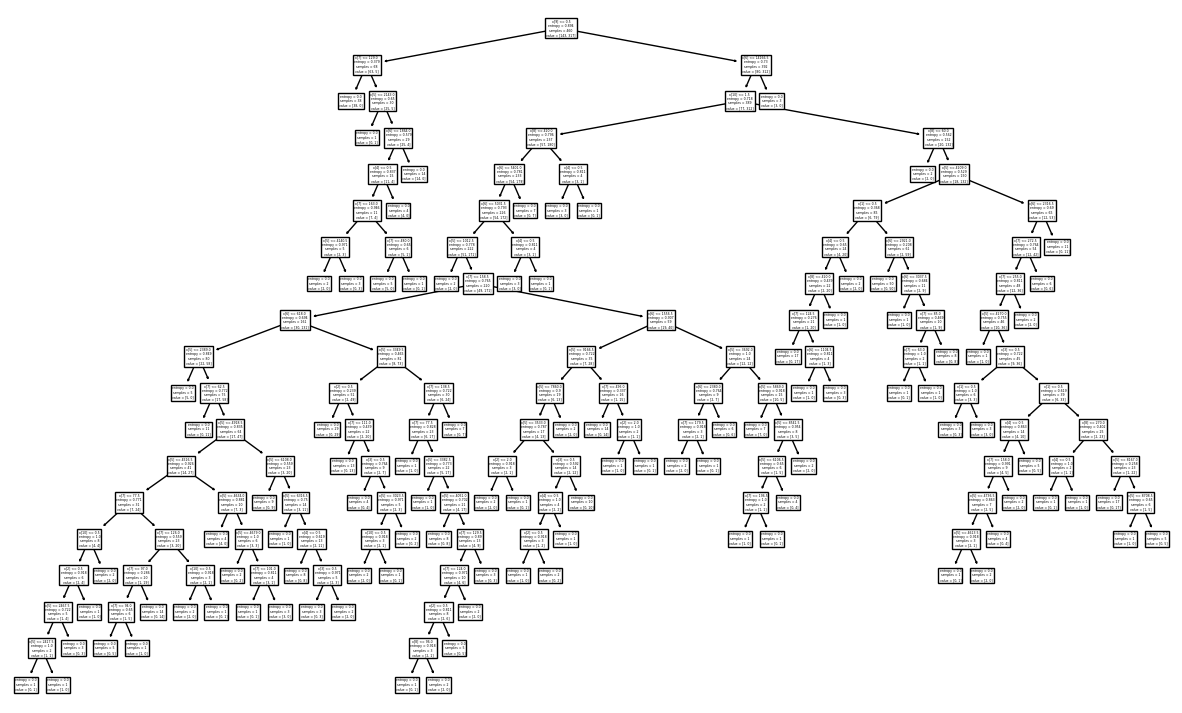

In [48]:
from sklearn import tree
plt.figure(figsize=(15,9))
tree.plot_tree(clf)
plt.show()

Bagging Classifier

In [49]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator = tree, n_estimators = 100, random_state = 42)

In [50]:
bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [51]:
y_pred_bg = bagging_clf.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred_bg)

0.7662337662337663

Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [54]:
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred_rf)

0.7662337662337663

Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators = 100)
ada_clf.fit(x_train,y_train)
y_pred_ada = ada_clf.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred_ada)

0.7662337662337663

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 100,max_depth = 3, random_state = 42)
gb_clf.fit(x_train,y_train)
y_pred_gb = gb_clf.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.7597402597402597

In [60]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()

In [61]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
y_pred_xgb = xgb_clf.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred_xgb)

0.7727272727272727